## Business Problem:

A dataset is provided which consists of data of 200 patients such as their BP level, sugar level, weight, and age. Using this dataset, we need to predict which drug to be given for a patient when we know the data of the patient such as their BP level, sugar level, weight, age etc?

### Dataset
### Variable Description

Age: Age of patient

Sex: Gender of patient

BP: Blood pressure of patient

Cholesterol: Cholesterol of patient

Na_to_K: Sodium to Potassium Ratio in Blood

Drug: Drug Type

The target feature is Drug type

https://www.kaggle.com/prathamtripathi/drug-classification

## Importing libraries

We use pandas library for dataframes, numpy library for array, matplotlib library for plotting, seaborn library for pair plots, sklearn library for splitting into train, test, split and encoding categorical values.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## Reading the input file

In [93]:
df=pd.read_csv('D:/greyatom/Leaner group/project 1/drug200.csv')

In [69]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Exploratory Data Analysis

### 1. Identify the characteristics of the dataset such as the types of data, shape of dataset, column headers, number of null values

In [46]:
df.shape

(200, 6)

In [70]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [48]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [49]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

## Observation:
There are two columns with numerical values and three columns with non-numerical values.

There are six columns and 200 rows.

No null values are present in the dataset.

Categorical features are 'Sex', 'BP','Cholesterol' and the target feature 'Drug'

### 2. Calculate the percentage of each category of drugs.

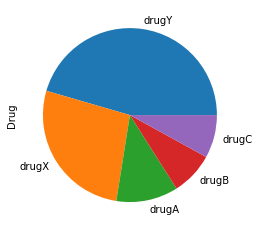

In [94]:
#calculate the percentage of each Drug category.
df.Drug.value_counts(normalize=True)

#plot the pie chart of Drug categories
df.Drug.value_counts(normalize=True).plot.pie()
plt.show()

## Observation:

Drug Y is the largest and drug B is the smallest category.

### 3. Convert the values in categorical columns to numerical values.

We use LabelEncoder to encode the categorical values in categorical columns into numerical values.

In [112]:
cat_feature = df.select_dtypes(include = "object").columns
print (cat_feature)

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')


In [113]:
cat_feature[1]

'BP'

In [114]:
#Label Encoding 'for object' to numeric conversion

LE_var = LabelEncoder()

for col in cat_feature:
    df[col] = LE_var.fit_transform(df[col].astype(str))

print (df.info())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB
None


In [67]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


### 4. Calculate the count of values in 'Sex' column.

In [62]:
df.Sex.value_counts()

1    104
0     96
Name: Sex, dtype: int64

In [74]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


## Single Variate Analysis
### 1. Plot histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002885F22B2B0>,
      dtype=object)

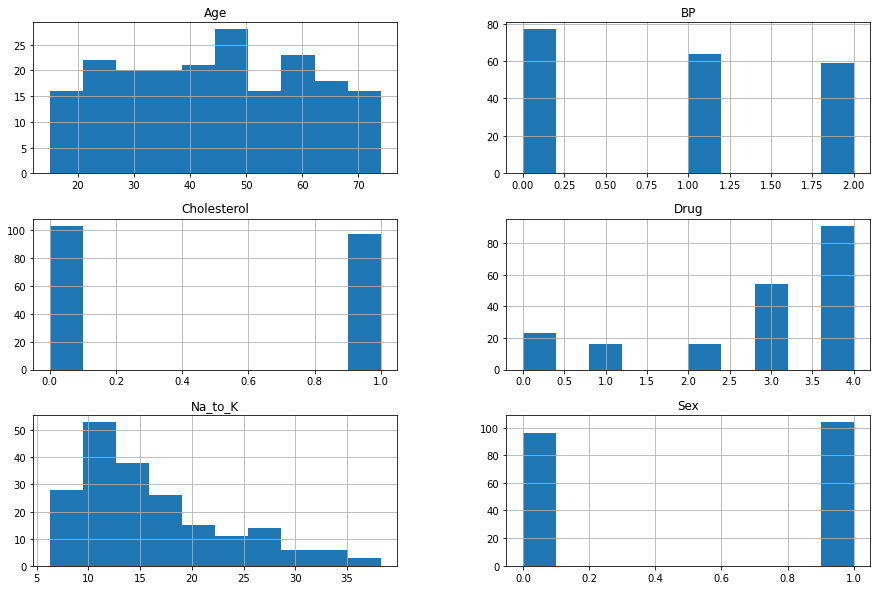

In [75]:
df.hist(figsize=(15,10))

### 2. Plot bar graph
Plot the values in drug column as a bar graph.

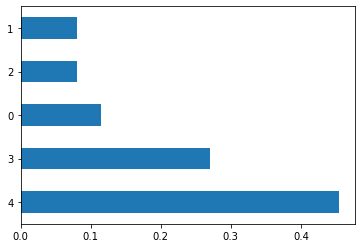

In [91]:
df.Drug.value_counts(normalize=True)

#Plot the bar graph of percentage Drug categories
df.Drug.value_counts(normalize=True).plot.barh()
plt.show()

### 3. Plot a pie chart.

Plot the values in BP column as a pie chart.

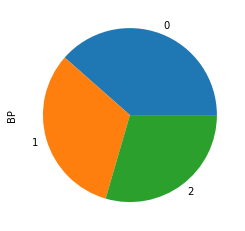

In [119]:
#calculate the percentage of the feature BP.
df.BP.value_counts(normalize=True)

#plot the pie chart of the feature BP
df.BP.value_counts(normalize=True).plot.pie()
plt.show()

## Bivariate Analysis

### 1. Plot scatter plots of each variable against another variable.

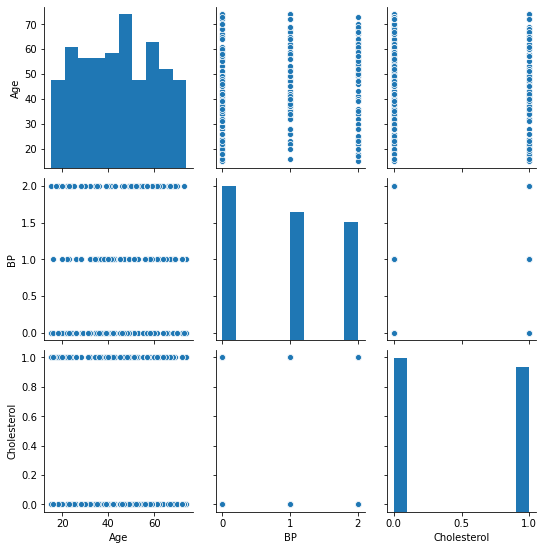

In [118]:
sns.pairplot(data = df, vars=['Age','BP','Cholesterol'])
plt.show()

### 2. Plot scatter plot of age against BP.

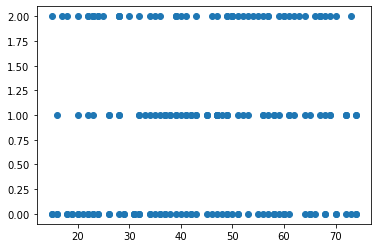

In [117]:
#scatter plot
plt.scatter(df.Age,df.BP)
plt.show()

## Correlation Matrix
We cannot use more than 2 variables in a scaterplot or pair plot. In correlation matrix we can see the relationship between three numerical variables in a graph

In [120]:
df[['Age','BP','Cholesterol']].corr()

,Age,BP,Cholesterol
Age,1.000000,0.054212,-0.068234
BP,0.054212,1.000000,-0.137552
Cholesterol,-0.068234,-0.137552,1.000000


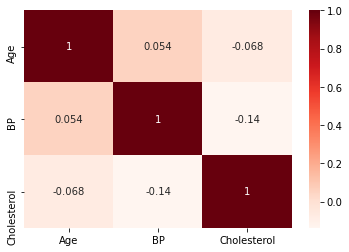

In [116]:


#plot the correlation matrix of Age, BP and Cholesterol in data dataframe.
sns.heatmap(df[['Age','BP','Cholesterol']].corr(), annot=True, cmap = 'Reds')
plt.show()

### Multivariate Analysis

We plot multiple variables and use the drug category as a classifier with different colors.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


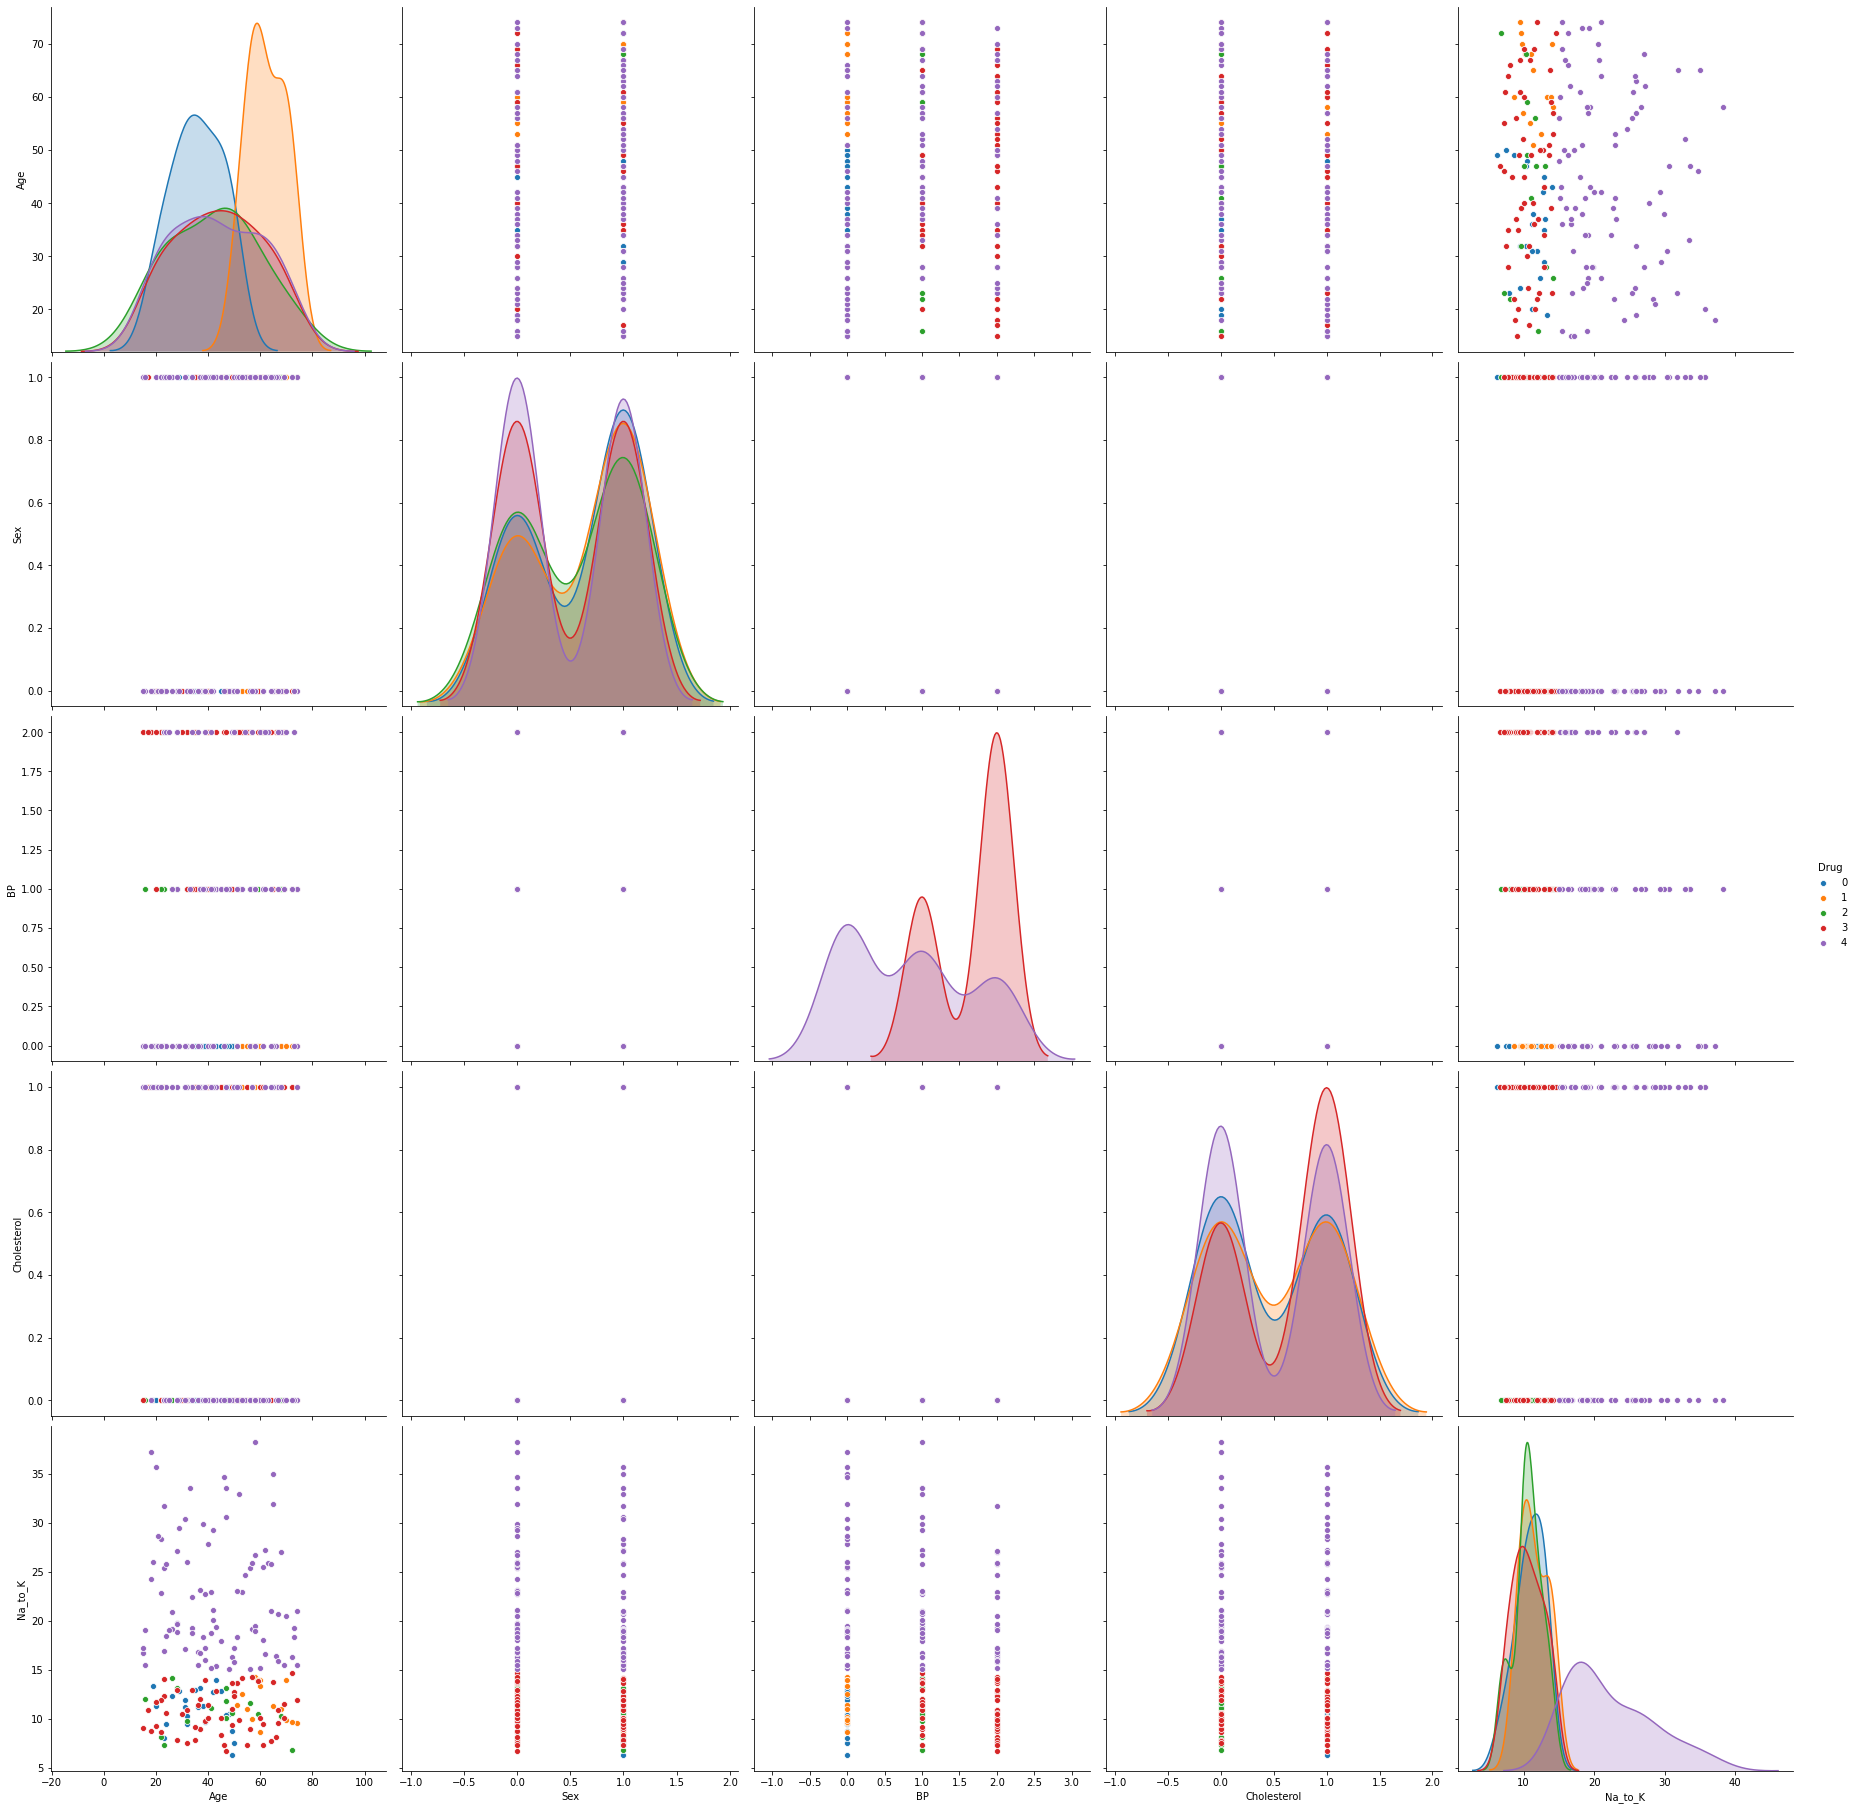

In [123]:

sns.pairplot(df,hue="Drug",size=5)
plt.show()

## Finding outliers

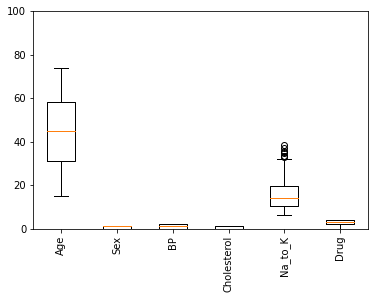

In [83]:
num_cols =df.columns
fig, ax= plt.subplots()
ax.boxplot(df[num_cols].values)
ax.set_xticklabels(num_cols, rotation = 90)
ax.set_ylim(0,100)
plt.show()

### Observation

It shows outliers only in the feature 'Na_to_K' in this dataset

## Creating the X and y dataset where y contains only the dependent variable and X contains the independent variables

### Splitting the dataset into train and test data

In [124]:
X = df.drop(["Drug"],1)
y = df["Drug"].copy()

In [127]:
#### train and test data has been split in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

### 1. LinearRegression Model

In [128]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [130]:
from sklearn.metrics import mean_squared_error
#y_pred = lr.predict(X_val)
y_pred = lr.predict(X_test)

print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

Test RMSE: 0.8617175212810471


### 2. Random forest Regressor


In [137]:

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [138]:

predictions = rf.predict(X_test)

print('Test RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

Test RMSE: 0.15576873884062872


### 3. Xgboost


In [136]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
xgb = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)

print('Test RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))




Test RMSE: 0.15811388300841897



### Observation:

Randomforest Regressor displayed a low 'RMSE' score compared to other  models. Hence it is used for predicting the test dataset.


In [140]:
y_pred_test = rf.predict(X_test)

In [141]:
y_pred_test

array([3.   , 4.   , 4.   , 4.   , 0.   , 4.   , 2.998, 4.   , 2.998,
       4.   , 3.   , 3.   , 4.   , 3.   , 4.   , 4.   , 1.   , 3.9  ,
       0.02 , 3.   , 4.   , 2.004, 4.   , 0.   , 0.   , 0.   , 4.   ,
       2.996, 4.   , 2.996, 4.   , 4.   , 4.   , 2.996, 2.998, 2.004,
       3.   , 1.   , 4.   , 1.008])